# Practical on Statistical Testing

In [29]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from scipy.stats import mannwhitneyu 
import matplotlib.colors as mcolors
import scipy.stats as stats
import pandas as pd
import math
import seaborn as sns
from scipy.stats import ttest_rel

# Normality Test

# 1) Q-Q Plot

In [4]:
wa_haar=[65.2,65.12,65.24,65.13,65.18,65.17,65.13,65.18,65.12,65.11,65.3,65.07]
wa_13_7=[61.24,53.37,61.18,61.17,53.39,61.15,61.2,61.25,61.17,61.09,61.35,61.16]

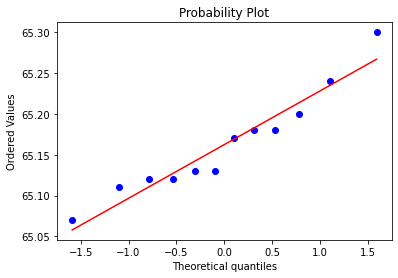

In [5]:
stats.probplot(wa_haar, dist="norm", plot=plt)
plt.show()

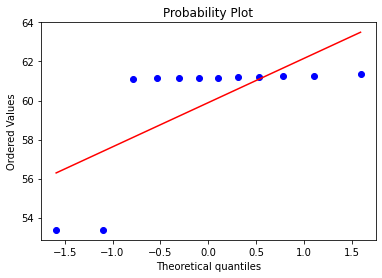

In [10]:
stats.probplot(wa_13_7, dist="norm", plot=plt)
plt.show()

# 2) Shapiro wilks test

In [9]:
shapiro_test = stats.shapiro(wa_haar)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9385743141174316, p-value=0.47982633113861084


In [11]:
shapiro_test = stats.shapiro(wa_13_7)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.48484015464782715, p-value=1.3688990293303505e-05


In [14]:
nc_wa=[1,0.998,1,1,0.999,1,1,1,1,1]
nc_sp005=[0.984,0.994,0.996,0.989,0.989,0.989,0.989,0.989,0.989,0.989]
nc_sp001=[0.995,0.998,1,0.999,0.999,1,1,1,1,1]
nc_gn01=[1,0.998,1,1,0.999,1,1,1,1,1]
nc_gn05=[1,0.998,1,1,0.999,1,1,1,1,1]
nc_cr100=[1,0.998,1,1,0.999,1,1,1,1,1]
nc_cr128=[0.990,0.988,0.990,0.990,0.990,0.990,0.990,0.990,0.990,0.990]
nc_cr256=[0.754,0.754,0.754,0.754,0.754,0.754,0.754,0.754,0.754,0.754]
nc_hist=[0.998,0.998,0.999,0.990,0.996,0.996,0.999,0.999,0.991,0.997]
nc_med=[0.353,0.245,0.280,0.192,0.313,0.335,0.296,0.278,0.268,0.338]
nc_jpg100=[1,0.999,1,1,1,1,1,1,1,1]

In [15]:
methodname=['nc_wa','nc_sp005','nc_sp001','nc_gn01','nc_gn05','nc_cr100','nc_cr128','nc_cr256','nc_hist','nc_med','nc_jpg100']

# 3) Mann Whitney U test

Non-parametric tests (sometimes referred to as ‘distribution-free tests’) are used when you assume the data in your populations of interest do not have a Normal distribution. You can think of the Mann Whitney U-test as analogous to the unpaired Student’s t-test, 

In [16]:
ncc_data=[nc_wa,nc_sp005,nc_sp001,nc_gn01,nc_gn05,nc_cr100,nc_cr128,nc_cr256,nc_hist,nc_med,nc_jpg100]

In [17]:
ncc_data=np.array(ncc_data)
data_ncc=np.transpose(ncc_data)

In [18]:
print(data_ncc)

[[1.    0.984 0.995 1.    1.    1.    0.99  0.754 0.998 0.353 1.   ]
 [0.998 0.994 0.998 0.998 0.998 0.998 0.988 0.754 0.998 0.245 0.999]
 [1.    0.996 1.    1.    1.    1.    0.99  0.754 0.999 0.28  1.   ]
 [1.    0.989 0.999 1.    1.    1.    0.99  0.754 0.99  0.192 1.   ]
 [0.999 0.989 0.999 0.999 0.999 0.999 0.99  0.754 0.996 0.313 1.   ]
 [1.    0.989 1.    1.    1.    1.    0.99  0.754 0.996 0.335 1.   ]
 [1.    0.989 1.    1.    1.    1.    0.99  0.754 0.999 0.296 1.   ]
 [1.    0.989 1.    1.    1.    1.    0.99  0.754 0.999 0.278 1.   ]
 [1.    0.989 1.    1.    1.    1.    0.99  0.754 0.991 0.268 1.   ]
 [1.    0.989 1.    1.    1.    1.    0.99  0.754 0.997 0.338 1.   ]]


In [19]:
df1=pd.DataFrame(data_ncc,columns=methodname)

In [20]:
df1

,nc_wa,nc_sp005,nc_sp001,nc_gn01,nc_gn05,nc_cr100,nc_cr128,nc_cr256,nc_hist,nc_med,nc_jpg100
0,1.000,0.984,0.995,1.000,1.000,1.000,0.990,0.754,0.998,0.353,1.000
1,0.998,0.994,0.998,0.998,0.998,0.998,0.988,0.754,0.998,0.245,0.999
2,1.000,0.996,1.000,1.000,1.000,1.000,0.990,0.754,0.999,0.280,1.000
3,1.000,0.989,0.999,1.000,1.000,1.000,0.990,0.754,0.990,0.192,1.000
4,0.999,0.989,0.999,0.999,0.999,0.999,0.990,0.754,0.996,0.313,1.000
5,1.000,0.989,1.000,1.000,1.000,1.000,0.990,0.754,0.996,0.335,1.000
6,1.000,0.989,1.000,1.000,1.000,1.000,0.990,0.754,0.999,0.296,1.000
7,1.000,0.989,1.000,1.000,1.000,1.000,0.990,0.754,0.999,0.278,1.000
8,1.000,0.989,1.000,1.000,1.000,1.000,0.990,0.754,0.991,0.268,1.000
9,1.000,0.989,1.000,1.000,1.000,1.000,0.990,0.754,0.997,0.338,1.000


In [23]:
alpha = 0.05
stat, p_value = mannwhitneyu(df1.values[:,0],df1.values[:,2],alternative='two-sided') 
print(p_value,)

0.34997074430366115


# 4) Paired t test

In [24]:
wa_haar=[65.2,65.12,65.24,65.13,65.18,65.17,65.13,65.18,65.12,65.11,65.3,65.07]
wa_6_2=[61.81,61.45,61.56,61.43,61.4,61.38,61.64,61.53,61.44,61.45,61.71,61.65]

In [25]:
shapiro_test = stats.shapiro(wa_haar)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9385743141174316, p-value=0.47982633113861084


In [26]:
shapiro_test = stats.shapiro(wa_6_2)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9082430005073547, p-value=0.20255470275878906


In [31]:
alpha = 0.05
stat, p_value = ttest_rel(wa_haar,wa_6_2,alternative='two-sided')
print(p_value)
if p_value<0.05:
    print("Significant diff ")
else:
    print("No sig diff")

1.7019074086415564e-17
Significant diff 


# 5) Unpaired t test

In [33]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(wa_haar,wa_6_2,alternative='two-sided')
print(p_value)
if p_value<0.05:
    print("Significant diff ")
else:
    print("No sig diff")

5.745342540054217e-29
Significant diff 


# 6) ANOVA

In [35]:
df_psnr_k2=pd.read_excel('AirplanePSNR_k2.xlsx')
df_psnr_k2=df_psnr_k2.drop('levels',axis=1)
df_psnr_k2

,bpbp5,bpb1,bpb15,bpb2
0,50.37,47.33,45.59,44.33
1,48.23,45.23,43.48,42.21
2,46.79,43.78,42.05,40.77
3,45.72,42.69,40.98,39.68
4,44.93,41.91,40.00,38.75
5,43.79,40.90,39.16,38.01
6,43.16,40.06,38.37,37.33


In [36]:
bp5=df_psnr_k2['bpbp5']
b1=df_psnr_k2['bpb1']
b15=df_psnr_k2['bpb15']
b2=df_psnr_k2['bpb2']

In [37]:
from scipy.stats import f_oneway

In [38]:
f_oneway(bp5,b1,b15,b2)

F_onewayResult(statistic=7.429174982097036, pvalue=0.0010978416309127296)

In [39]:
df_psnr_k4=pd.read_excel('AirplanePSNR_k4.xlsx')
df_psnr_k4=df_psnr_k4.drop('levels',axis=1)
df_psnr_k4

,bpbp5,bpb1,bpb15,bpb2
0,41.19,38.20,36.41,35.16
1,38.72,35.74,34.03,32.72
2,37.29,34.25,32.48,31.21
3,36.13,33.12,31.46,30.06
4,35.27,32.52,30.42,28.98
5,34.21,31.72,29.63,28.14
6,33.60,31.15,29.31,26.70


In [40]:
bp5=df_psnr_k4['bpbp5']
b1=df_psnr_k4['bpb1']
b15=df_psnr_k4['bpb15']
b2=df_psnr_k4['bpb2']

In [41]:
f_oneway(bp5,b1,b15,b2)

F_onewayResult(statistic=7.1019933280573015, pvalue=0.0014055842077786882)

# 7) ANOVA 3 Way

In [43]:
df_anova_psnr=pd.read_excel('Anova_3way_PSNR.xlsx')
df_anova_psnr

,k,level,bpb,psnr
0,2,0,0.5,50.37
1,2,1,0.5,48.23
2,2,2,0.5,46.79
3,2,3,0.5,45.72
4,2,4,0.5,44.93
5,2,5,0.5,43.79
6,2,6,0.5,43.16
7,2,0,1.0,47.33
8,2,1,1.0,45.23
9,2,2,1.0,43.78


In [44]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Sample data
data = {
    'k': list(df_anova_psnr['k'].values),
    'level': list(df_anova_psnr['level'].values),
    'bpb': list(df_anova_psnr['bpb'].values),
    'psnr': list(df_anova_psnr['psnr'].values)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit the three-way ANOVA model
model = ols('psnr ~ C(k)+C(level)+C(bpb)+C(k):C(bpb)+C(k):C(level)+C(bpb):C(level)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq    df             F        PR(>F)
C(k)             1261.410864   1.0  30665.798858  1.526371e-30
C(level)          319.813686   6.0   1295.816512  1.024982e-22
C(bpb)            291.138236   3.0   2359.259469  1.531033e-23
C(k):C(bpb)         0.332036   3.0      2.690675  7.703239e-02
C(k):C(level)       0.264886   6.0      1.073260  4.142201e-01
C(bpb):C(level)     0.470014  18.0      0.634799  8.281172e-01
Residual            0.740414  18.0           NaN           NaN
